# Building an image recognition neural network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras

# Setting random seeds to get reproducible results
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(1)

### Importing and reading the dataset

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print("Size of the training set", len(x_train))
print("Size of the testing set", len(x_test))

11493376/11490434 [==============================] - 1s 0us/step

The label is 2


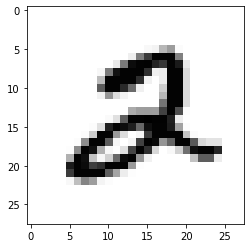

In [3]:
plt.imshow(x_train[5], cmap='Greys')
print("The label is", y_train[5])

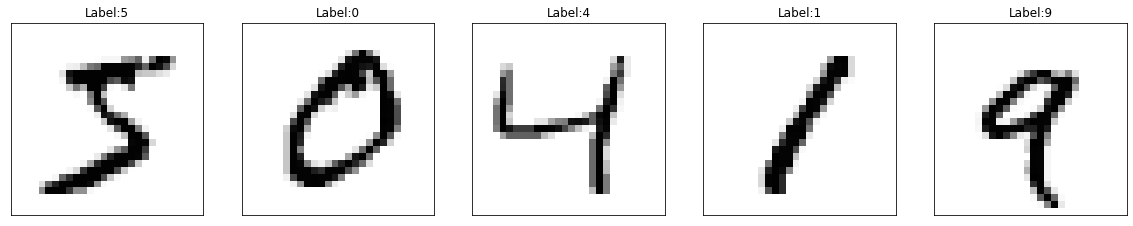

In [4]:
fig = plt.figure(figsize=(20,20))
for i in range(5):
    ax = fig.add_subplot(1, 5, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='Greys')
    ax.set_title('Label:' + str(y_train[i]))

### Pre-processing the data

In [5]:
# Reshaping the features.
# In the reshape function we use the -1 as a placeholder for the size of the dataset.

x_train_reshaped = x_train.reshape(-1, 28*28)
x_test_reshaped = x_test.reshape(-1, 28*28)

In [6]:
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

### Building and training the neural network

In [7]:
# Imports
#import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.layers import Dense, Dropout, Activation
#from tensorflow.keras.optimizers import SGD

# Building the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28*28,)))
model.add(Dropout(.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.2))
model.add(Dense(10, activation='softmax'))

# Compiling the model
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


2021-08-07 14:08:16.869030: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model.fit(x_train_reshaped, y_train_cat, epochs=10, batch_size=10)

2021-08-07 14:08:16.976424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
6000/6000 [==============================] - 11s 2ms/step - loss: 2.0650 - accuracy: 0.7175

### Making predictions

In [9]:
predictions_vector = model.predict(x_test_reshaped)

In [10]:
predictions = [np.argmax(pred) for pred in predictions_vector]

The label is 4
The prediction is 4


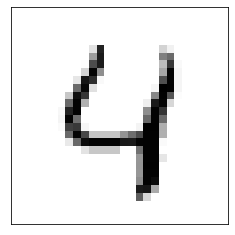

In [11]:
plt.imshow(x_test[4], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[4])
print("The prediction is", predictions[4])

Sometimes the model makes mistakes too.

The label is 3
The prediction is 3


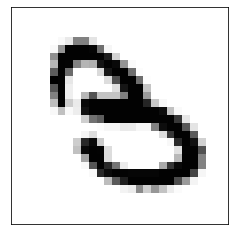

In [12]:
plt.imshow(x_test[18], cmap='Greys')
plt.xticks([])
plt.yticks([])
print("The label is", y_test[18])
print("The prediction is", predictions[18])

### Finding the accuracy of the model on the test set

In [13]:
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        num_correct += 1

print("The model is correct", num_correct, "times out of", len(y_test))
print("The accuracy is", num_correct/len(y_test))

The model is correct 9459 times out of 10000
The accuracy is 0.9459
